# **Week 6: Lab Exercises for COMP499/691 Conversational AI**

The goal of this lab is to further familiarize yourself with SpeechBrain.
In the previous labs, you had to properly complete some "prefilled" code that implemented some speechbrain model. In this lab, instead, you will do a little step ahead and write a full training recipe from scratch.

## **Task Description**

This time we will work on speaker identification. The task is very simple: you have a speech signal in input, and you have to tell which of the N speakers in the pool is speaking.

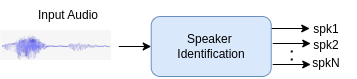

This problem is a supervised classification task, which is conceptually very similar to the audio digit classification already addressed in Lab 2 (the difference is that now we have speaker identities instead of digits in the output).

We will work on a small portion of the TIMIT dataset that contains 26 different speakers.


**Run the code below** to download and unzip the dataset.

In [ ]:
!wget -O TIMIT_tiny.zip  https://www.dropbox.com/scl/fi/7t7fi0t4cv424p7zem46g/TIMIT_tiny.zip?rlkey=efh571iyya5sb7w1kvk2xfi9h&dl=0

--2025-02-24 01:40:04--  https://www.dropbox.com/scl/fi/7t7fi0t4cv424p7zem46g/TIMIT_tiny.zip?rlkey=efh571iyya5sb7w1kvk2xfi9h
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5d3b1d15dcf051e5077bf1477.dl.dropboxusercontent.com/cd/0/inline/Ckvr5N85UfBy6Xaax4btzsn8EVeCTJhsUm-lUjRheXWLb-0EubIyPfrheND7kpZzslhQERF8JXNrb97fprl7errT4IN2jfrYrHJgxmN8-ly9ILVVen8GWG1JGJVRN98sykUdMj-mUI77JpNlQnWMInJU/file# [following]
--2025-02-24 01:40:05--  https://uca5d3b1d15dcf051e5077bf1477.dl.dropboxusercontent.com/cd/0/inline/Ckvr5N85UfBy6Xaax4btzsn8EVeCTJhsUm-lUjRheXWLb-0EubIyPfrheND7kpZzslhQERF8JXNrb97fprl7errT4IN2jfrYrHJgxmN8-ly9ILVVen8GWG1JGJVRN98sykUdMj-mUI77JpNlQnWMInJU/file
Resolving uca5d3b1d15dcf051e5077bf1477.dl.dropboxusercontent.com (uca5d3b1d15dcf051e5077bf1477.dl.dropboxusercontent.com)... 162.125.5.15, 2620

**Run the code below** to unzip the dataset.

In [ ]:
!unzip /content/TIMIT_tiny.zip -d data

Archive:  /content/TIMIT_tiny.zip
   creating: data/fcmr0/
  inflating: data/fcmr0/sx385.wav    
  inflating: data/fcmr0/si475.mfc25  
  inflating: data/fcmr0/sa1.lab      
  inflating: data/fcmr0/sx385.txt    
  inflating: data/fcmr0/si1105.phn   
  inflating: data/fcmr0/sx385.mfc30  
  inflating: data/fcmr0/si475.txt    
  inflating: data/fcmr0/sx115.txt    
  inflating: data/fcmr0/si1105.PHN_SP  
  inflating: data/fcmr0/si1735.mfc50  
  inflating: data/fcmr0/sa1.wav      
  inflating: data/fcmr0/sa1.phn      
  inflating: data/fcmr0/sx115.mfc30  
  inflating: data/fcmr0/si475.mfc30  
  inflating: data/fcmr0/sx25.mfc30   
  inflating: data/fcmr0/sx295.PHN_SP  
  inflating: data/fcmr0/sx205.wrd    
  inflating: data/fcmr0/si475.PHN_SP  
  inflating: data/fcmr0/sa1.mfc25    
  inflating: data/fcmr0/sx385.wrd    
  inflating: data/fcmr0/sx115.wav    
  inflating: data/fcmr0/si1105.mfc50  
  inflating: data/fcmr0/sx25.wav     
  inflating: data/fcmr0/sa1.txt      
  inflating: data/fcmr0

**Run the code below to install speechbrain**.

In [ ]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

# Clone SpeechBrain repository
!git clone https://github.com/speechbrain/speechbrain/

## **Exercise 1: Data Preparation**

If you inspect the data stored in `/content/data` you will see 26 folders. Each folder contains the audio signals recorded for a single speaker. You can see different types of files in each folder. For this lab, you only need to consider the ".wav" ones. The name of each file (e.g., `si475.wav`) is a sentence identifier (`si475`). Each signal is sampled at 16 kHz.

**Write the code for preparing the JSON data-manifest files**. You have to split the dataset into train, validation, and test sets. Always use the sentence 'sa1.wav' (available for each speaker) for validation. Use the sentence 'sa2.wav' (available for each speaker) for testing. Use all the other sentences for training.

You have to create 3 JSON files:
- 'train.json'
- 'valid.json'
- 'test.json'

They should be formatted in the following way:


**train.json**
```
{
  "mpgl0_si469": {
    "path": "data/mpgl0/si469.wav",
    "length": 2.88,
    "spk": "mpgl0"
  },
  "mpgl0_si1729": {
    "path": "data/mpgl0/si1729.wav",
    "length": 3.5904375,
    "spk": "mpgl0"
  },
  "mpgl0_si1099": {
    "path": "data/mpgl0/si1099.wav",
    "length": 2.86725,
    "spk": "mpgl0"
  },
....

```

**valid.json**
```
{
  "mpgl0_sa1": {
    "path": "data/mpgl0/sa1.wav",
    "length": 3.6288125,
    "spk": "mpgl0"
  },
  "mtmr0_sa1": {
    "path": "data/mtmr0/sa1.wav",
    "length": 3.18725,
    "spk": "mtmr0"
  },
  "mwvw0_sa1": {
    "path": "data/mwvw0/sa1.wav",
    "length": 3.161625,
    "spk": "mwvw0"
  },
....
```

**test.json**

```
{
  "mpgl0_sa2": {
    "path": "data/mpgl0/sa2.wav",
    "length": 3.02725,
    "spk": "mpgl0"
  },
  "mtmr0_sa2": {
    "path": "data/mtmr0/sa2.wav",
    "length": 2.624,
    "spk": "mtmr0"
  },
  "mwvw0_sa2": {
    "path": "data/mwvw0/sa2.wav",
    "length": 2.5088125,
    "spk": "mwvw0"
  },

```

If everything is fine, you should have 208 files for training, 26 for validation, and 26 for testing.

**Suggestions:**
- Use the get_all_files in speechbrain.utils.data_utils to get a list of all the files with the wav extension.
- You can get the number of samples of each wave with torchaudio.info. You have to compute the duration in seconds by diving it for the sampling frequency.

In [ ]:
import torch
import torchaudio
import json
from speechbrain.utils.data_utils import get_all_files
import re
import json

**Your code here:**

In [62]:
import json
import torchaudio
from speechbrain.utils.data_utils import get_all_files
import os
from speechbrain.dataio.dataio import read_audio


# Your code here
audiofiles = get_all_files(os.path.join('/content/data'), match_and=[".wav"])

train_files = []
test_files = []
valid_files = []

for audiofile in audiofiles:
  if 'sa1.wav' == audiofile.split('/')[4]:
    valid_files.append(audiofile)
  elif 'sa2.wav' == audiofile.split('/')[4]:
    test_files.append(audiofile)
  elif'.wav' in audiofile.split('/')[4]:
    train_files.append(audiofile)


print(len(train_files))
print(len(test_files))
print(len(valid_files))


def create_json(json_file, audiolist):
  json_dict = {}
  for audiofile in audiofiles:

    # Getting info
    audioinfo = torchaudio.info(audiofile) # Your code here
    signal = read_audio(audiofile)


    # Compute the duration in seconds.
    # This is the number of samples divided by the sampling frequency
    duration = audioinfo.num_frames / audioinfo.sample_rate  # Your code here

    path = audiofile.split("/")[2] + "/"+ audiofile.split("/")[3] + "/" + audiofile.split("/")[4]

    speaker = audiofile.split("/")[-2]

    # Get a unique utterance id
    uttid =  audiofile.split("/")[-2] + "_" + audiofile.split("/")[-1][:-4] # Your code here (aim for 1 line)

    # Create entry for this utterance
    json_dict[uttid] = {
            "path": path,
            "length": duration,
            "spk": speaker,
    }

    # Writing the dictionary to the json file
    with open(json_file, mode="w", encoding="utf-8") as json_f:
      json.dump(json_dict, json_f, indent=2)



create_json('train.json', train_files)
create_json('valid.json', test_files)
create_json('test.json', valid_files)


208
26
26


## **Exercise 2: Speaker Identification with FBANKs and Xvectors**

You have to implement the following model:



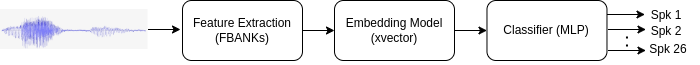

**Suggestion:** You can copy-and-paste the code from the previous labs solving similar classification problems. You only need to do the little modifications to the hyperparameter and train.py files needed to implement the system in the figure.

**Write the code for the hyperparameters**:

In [64]:
%%file hparams_xvector_fbanks.yaml

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mirco Ravanelli 2021
# #################################

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Xvector/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Data manifests
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# Training logger
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Metrics
error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Audio parameters
n_mels: 40
sample_rate: 16000

# Training config
number_of_epochs: 20
batch_size: 64
lr_start: 0.001
lr_final: 0.0001
n_classes: 26
emb_dim: 128



# Data loader
dataloader_options:
    batch_size: !ref <batch_size>

# Feature processing
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>
    deltas: False
    context: False
    requires_grad: False
    sample_rate: !ref <sample_rate>
    n_fft:  400
    param_change_factor:  1.0
    param_rand_factor:  0.0
    left_frames:  5
    right_frames: 5
    win_length: 25
    hop_length: 10

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Model architecture
embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mels>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [64, 64, 64, 64, 128]
    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

# Training components
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

# Optimization
opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>
    weight_decay: 1e-5

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

# Checkpointing
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_xvector_fbanks.yaml


**Write the code for the training script**:

In [68]:
%%file train.py

#!/usr/bin/env python3
"Recipe for training a speaker classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import torchaudio.functional as F

class TIMITBrain(sb.Brain):
    def compute_forward(self, batch, stage):
        """Computations from input to output probabilities"""
        batch = batch.to(self.device)
        wavs, lens = batch.sig  # unpacking of audio data

        # Audio augmentation for training stage
        if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
            wavs, lens = self.hparams.wav_augment(wavs, lens)

        # Feature extraction and normalization
        features = self.modules.compute_features(wavs)

        features = self.modules.mean_var_norm(features, lens)

        # Embedding generation
        embeddings = self.modules.embedding_model(features)

        # Classifier predictions
        predictions = self.modules.classifier(embeddings)
        return predictions

    def compute_objectives(self, predictions, batch, stage):
        """Compute classification loss"""
        _, lens = batch.sig
        spk, _ = batch.spk_encoded

        # Handle augmented samples
        if stage == sb.Stage.TRAIN and hasattr(self.modules, "env_corrupt"):
            spk = torch.cat([spk, spk], dim=0)
            lens = torch.cat([lens, lens])

        loss = sb.nnet.losses.nll_loss(predictions, spk, lens)

        # Update metrics
        self.loss_metric.append(batch.id, predictions, spk, lens, reduction="batch")
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, spk, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Initialize metrics"""
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Handle end-of-stage operations"""
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
        else:
            stats = {"loss": stage_loss, "error": self.error_metrics.summarize("average")}

        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

def dataio_prep(hparams):
    """Prepare data pipelines"""
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    # Create directories if they don't exist
    os.makedirs(hparams["save_folder"], exist_ok=True)


    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav_path):
        sig = sb.dataio.dataio.read_audio(wav_path)
        info = torchaudio.info(wav_path)
        if info.sample_rate != hparams["sample_rate"]:
            sig = F.resample(sig, info.sample_rate, hparams["sample_rate"])
        return sig

    @sb.utils.data_pipeline.takes("spk")
    @sb.utils.data_pipeline.provides("spk", "spk_encoded")
    def label_pipeline(spk):
        yield spk
        spk_encoded = label_encoder.encode_label_torch(spk)
        yield spk_encoded

    datasets = {}
    for dataset in ["train", "valid", "test"]:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=hparams[f"{dataset}_annotation"],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "spk_encoded"],
        )

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="spk",
    )
    label_encoder.expect_len(26)

    return datasets

if __name__ == "__main__":
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    datasets = dataio_prep(hparams)
    train_data = datasets["train"]
    valid_data = datasets["valid"]
    test_data = datasets["test"]

    digit_brain = TIMITBrain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    digit_brain.fit(
        epoch_counter=digit_brain.hparams.epoch_counter,
        train_set=train_data,
        valid_set=valid_data,
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    test_stats = digit_brain.evaluate(
        test_set=test_data,
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Overwriting train.py


**Run the code below to train your model.**

In [69]:
# Delete the output folder to start training from scratch
# (and not from a previous checkpoint).
!rm -rf ./results/Xvector/*

# Run Training
!python train.py hparams_xvector_fbanks.yaml --device='cpu'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Xvector/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: False. Using precision: fp32.
/usr/local/lib/python3.11/dist-packages/speechbrain/core.py:798: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. P

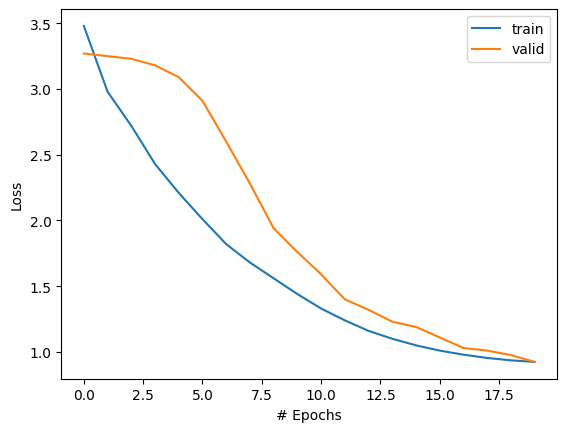

Epoch: 1, lr: 1.00e-03 - train loss: 3.48 - valid loss: 3.27, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 2.98 - valid loss: 3.25, valid error: 9.62e-01
Epoch: 3, lr: 9.05e-04 - train loss: 2.72 - valid loss: 3.23, valid error: 9.54e-01
Epoch: 4, lr: 8.58e-04 - train loss: 2.43 - valid loss: 3.18, valid error: 9.04e-01
Epoch: 5, lr: 8.11e-04 - train loss: 2.21 - valid loss: 3.09, valid error: 9.12e-01
Epoch: 6, lr: 7.63e-04 - train loss: 2.01 - valid loss: 2.91, valid error: 8.00e-01
Epoch: 7, lr: 7.16e-04 - train loss: 1.82 - valid loss: 2.60, valid error: 5.96e-01
Epoch: 8, lr: 6.68e-04 - train loss: 1.68 - valid loss: 2.28, valid error: 4.69e-01
Epoch: 9, lr: 6.21e-04 - train loss: 1.56 - valid loss: 1.94, valid error: 2.92e-01
Epoch: 10, lr: 5.74e-04 - train loss: 1.44 - valid loss: 1.76, valid error: 2.31e-01
Epoch: 11, lr: 5.26e-04 - train loss: 1.33 - valid loss: 1.59, valid error: 2.62e-01
Epoch: 12, lr: 4.79e-04 - train loss: 1.24 - valid loss: 1.40, valid error

In [70]:
import re
import matplotlib.pyplot as plt

def get_losses(log_file):
    """This function takes in input a path of a log-file and outputs the train
    and valid losses in lists of float numbers"""
    train_losses = []
    valid_losses = []

    # Regex pattern to capture 'train loss: <number>' and 'valid loss: <number>'
    pattern = r"train loss:\s*([\de\.+-]+).*valid loss:\s*([\de\.+-]+)"

    with open(log_file, 'r') as f:
        for line in f:
            # Search each line for the pattern
            match = re.search(pattern, line)
            if match:
                # Convert captured groups to float
                train_loss = float(match.group(1))
                valid_loss = float(match.group(2))
                train_losses.append(train_loss)
                valid_losses.append(valid_loss)

    return train_losses, valid_losses  # Return the two lists

# Usage example:
log_file = '/content/results/TIMIT_tiny/Fbank/Xvector/train_log.txt'
train_losses, valid_losses = get_losses(log_file)

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend()
plt.show()

with open(log_file) as f:
    log_text = f.read()
    print(log_text)


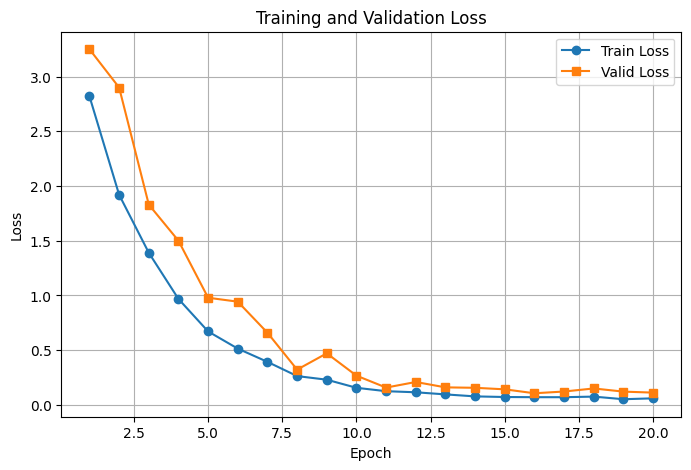

In [ ]:
import re
import matplotlib.pyplot as plt

# 1. Paste your log text here as a multi-line string:
log_text = """
Epoch: 1, lr: 1.00e-03 - train loss: 2.82 - valid loss: 3.25, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 1.92 - valid loss: 2.90, valid error: 9.62e-01
Epoch: 3, lr: 9.05e-04 - train loss: 1.39 - valid loss: 1.83, valid error: 3.46e-01
Epoch: 4, lr: 8.58e-04 - train loss: 9.68e-01 - valid loss: 1.50, valid error: 4.62e-01
Epoch: 5, lr: 8.11e-04 - train loss: 6.71e-01 - valid loss: 9.79e-01, valid error: 7.69e-02
Epoch: 6, lr: 7.63e-04 - train loss: 5.14e-01 - valid loss: 9.43e-01, valid error: 1.92e-01
Epoch: 7, lr: 7.16e-04 - train loss: 3.93e-01 - valid loss: 6.59e-01, valid error: 3.85e-02
Epoch: 8, lr: 6.68e-04 - train loss: 2.63e-01 - valid loss: 3.22e-01, valid error: 0.00e+00
Epoch: 9, lr: 6.21e-04 - train loss: 2.30e-01 - valid loss: 4.71e-01, valid error: 7.69e-02
Epoch: 10, lr: 5.74e-04 - train loss: 1.56e-01 - valid loss: 2.67e-01, valid error: 3.85e-02
Epoch: 11, lr: 5.26e-04 - train loss: 1.25e-01 - valid loss: 1.58e-01, valid error: 0.00e+00
Epoch: 12, lr: 4.79e-04 - train loss: 1.15e-01 - valid loss: 2.09e-01, valid error: 3.85e-02
Epoch: 13, lr: 4.32e-04 - train loss: 9.57e-02 - valid loss: 1.60e-01, valid error: 0.00e+00
Epoch: 14, lr: 3.84e-04 - train loss: 7.75e-02 - valid loss: 1.56e-01, valid error: 0.00e+00
Epoch: 15, lr: 3.37e-04 - train loss: 7.18e-02 - valid loss: 1.42e-01, valid error: 0.00e+00
Epoch: 16, lr: 2.89e-04 - train loss: 7.01e-02 - valid loss: 1.06e-01, valid error: 0.00e+00
Epoch: 17, lr: 2.42e-04 - train loss: 7.01e-02 - valid loss: 1.22e-01, valid error: 0.00e+00
Epoch: 18, lr: 1.95e-04 - train loss: 7.55e-02 - valid loss: 1.50e-01, valid error: 3.85e-02
Epoch: 19, lr: 1.47e-04 - train loss: 5.16e-02 - valid loss: 1.21e-01, valid error: 3.85e-02
Epoch: 20, lr: 1.00e-04 - train loss: 5.97e-02 - valid loss: 1.12e-01, valid error: 3.85e-02
Epoch loaded: 17 - test loss: 9.28e-02, test error: 0.00e+00
"""

# 2. Use a regex pattern to capture epoch, train loss, valid loss, etc.
pattern = r"Epoch:\s*(\d+).*train loss:\s*([\de\.-]+).*valid loss:\s*([\de\.-]+).*valid error:\s*([\de\.-]+)"

epochs = []
train_losses = []
valid_losses = []

# 3. Loop through each line and extract the data
for line in log_text.strip().split("\n"):
    match = re.search(pattern, line)
    if match:
        epoch = int(match.group(1))
        train_loss = float(match.group(2))
        valid_loss = float(match.group(3))
        epochs.append(epoch)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

# 4. Plot train and validation loss
plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, marker='o', label='Train Loss')
plt.plot(epochs, valid_losses, marker='s', label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


You have to tweak the hyperparameter (e.g., batch size, learning rate) a bit to improve the performance. Do at least 20 epochs, If everything goes well, you should see a training curve similar to this one:


```
Epoch: 1, lr: 1.00e-03 - train loss: 2.82 - valid loss: 3.25, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 1.92 - valid loss: 2.90, valid error: 9.62e-01
Epoch: 3, lr: 9.05e-04 - train loss: 1.39 - valid loss: 1.83, valid error: 3.46e-01
Epoch: 4, lr: 8.58e-04 - train loss: 9.68e-01 - valid loss: 1.50, valid error: 4.62e-01
Epoch: 5, lr: 8.11e-04 - train loss: 6.71e-01 - valid loss: 9.79e-01, valid error: 7.69e-02
Epoch: 6, lr: 7.63e-04 - train loss: 5.14e-01 - valid loss: 9.43e-01, valid error: 1.92e-01
Epoch: 7, lr: 7.16e-04 - train loss: 3.93e-01 - valid loss: 6.59e-01, valid error: 3.85e-02
Epoch: 8, lr: 6.68e-04 - train loss: 2.63e-01 - valid loss: 3.22e-01, valid error: 0.00e+00
Epoch: 9, lr: 6.21e-04 - train loss: 2.30e-01 - valid loss: 4.71e-01, valid error: 7.69e-02
Epoch: 10, lr: 5.74e-04 - train loss: 1.56e-01 - valid loss: 2.67e-01, valid error: 3.85e-02
Epoch: 11, lr: 5.26e-04 - train loss: 1.25e-01 - valid loss: 1.58e-01, valid error: 0.00e+00
Epoch: 12, lr: 4.79e-04 - train loss: 1.15e-01 - valid loss: 2.09e-01, valid error: 3.85e-02
Epoch: 13, lr: 4.32e-04 - train loss: 9.57e-02 - valid loss: 1.60e-01, valid error: 0.00e+00
Epoch: 14, lr: 3.84e-04 - train loss: 7.75e-02 - valid loss: 1.56e-01, valid error: 0.00e+00
Epoch: 15, lr: 3.37e-04 - train loss: 7.18e-02 - valid loss: 1.42e-01, valid error: 0.00e+00
Epoch: 16, lr: 2.89e-04 - train loss: 7.01e-02 - valid loss: 1.06e-01, valid error: 0.00e+00
Epoch: 17, lr: 2.42e-04 - train loss: 7.01e-02 - valid loss: 1.22e-01, valid error: 0.00e+00
Epoch: 18, lr: 1.95e-04 - train loss: 7.55e-02 - valid loss: 1.50e-01, valid error: 3.85e-02
Epoch: 19, lr: 1.47e-04 - train loss: 5.16e-02 - valid loss: 1.21e-01, valid error: 3.85e-02
Epoch: 20, lr: 1.00e-04 - train loss: 5.97e-02 - valid loss: 1.12e-01, valid error: 3.85e-02
Epoch loaded: 17 - test loss: 9.28e-02, test error: 0.00e+00

```

As you can see, you should be able to obtain a 0% error on both training and validation. If this is not the case, run the experiment again with a different set of hyperparameters. Note that we are using a tiny dataset and it is normal to see some significant performance variations after running the code multiple times with different random seeds.


It might be surprising to see a 0% error on both validation and test. On the other hand, for humans, it might be hard to detect which speaker is speaking among 26 candidates after listening for just a few minutes their voices. For a neural network, instead, this task is very easy. Even on large datasets containing noise recordings and thousands of speakers, a good neural network can identify speakers with 98-99% accuracy.




## **Exercise 3: Speaker Identification with MFCCs and Xvectors**

in this exercise, you have to run the same system as exercise 2, but with different speech features in the input.

This time, you should feed the system with mel frequency cepstral coefficients (MFCCs). You have to compute them with `speechbrain.lobes.features.MFCC` (please take a look at the documentation [here](https://speechbrain.readthedocs.io/en/latest/API/speechbrain.lobes.features.html). For this exercise, do not augment the features with the context and with the delta coefficients. You can compute 20 MFFCs.

Modify the hparam file to implement the MFCC-based speaker identification system. Note that you do not need to modify the train.py script as well.

**Your code here**:

In [ ]:
%%file hparams_xvector_mfccs.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/TIMIT_tiny/MFCC/Xvector/
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Data manifests
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# Training logger
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Metrics
error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Audio parameters
sample_rate: 16000
n_mfcc: 20  # Using 20 MFCCs
n_mels: 20

# Training config
number_of_epochs: 20
batch_size: 64
lr_start: 0.001
lr_final: 0.0001
n_classes: 26
emb_dim: 128

# Data loader
dataloader_options:
    batch_size: !ref <batch_size>

# Feature processing
compute_features: !new:speechbrain.lobes.features.MFCC
    n_mels: !ref <n_mels>
    n_mfcc: !ref <n_mfcc>
    context: False
    deltas: False
    n_fft:  400
    filter_shape: 'triangular'
    param_change_factor:  1.0
    param_rand_factor:  0.0
    left_frames:  5
    right_frames: 5
    win_length: 25
    hop_length: 10

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Model architecture
embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mels>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [64, 64, 64, 64, 128]
    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

# Training components
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

# Optimization
opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

# Checkpointing
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_xvector_mfccs.yaml


**Run the code below to train your model.**

In [ ]:
# Delete the output folder to start training from scratch
# (and not from a previous checkpoint).
!rm -rf ./results/TIMIT_tiny/MFCC/Xvector/

# !rm -rf ./results/TIMIT_tiny/Xvector/MFCCs/1986

# Run Training
!python train.py hparams_xvector_mfccs.yaml --device='cpu'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/TIMIT_tiny/MFCC/Xvector/
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: False. Using precision: fp32.
/usr/local/lib/python3.11/dist-packages/speechbrain/core.py:798: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is d

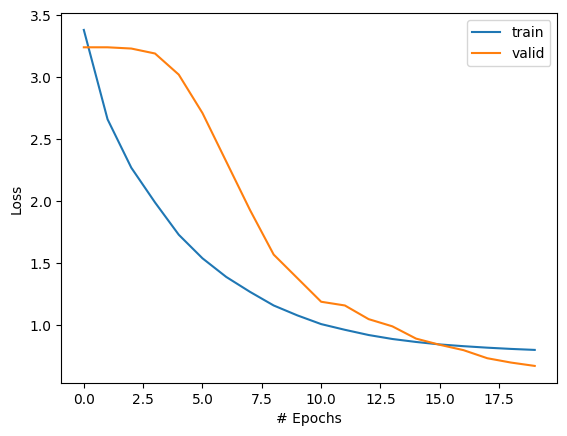

Epoch: 1, lr: 1.00e-03 - train loss: 3.38 - valid loss: 3.24, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 2.66 - valid loss: 3.24, valid error: 9.62e-01
Epoch: 3, lr: 9.05e-04 - train loss: 2.27 - valid loss: 3.23, valid error: 9.62e-01
Epoch: 4, lr: 8.58e-04 - train loss: 1.99 - valid loss: 3.19, valid error: 9.58e-01
Epoch: 5, lr: 8.11e-04 - train loss: 1.73 - valid loss: 3.02, valid error: 8.81e-01
Epoch: 6, lr: 7.63e-04 - train loss: 1.54 - valid loss: 2.71, valid error: 6.73e-01
Epoch: 7, lr: 7.16e-04 - train loss: 1.39 - valid loss: 2.32, valid error: 5.65e-01
Epoch: 8, lr: 6.68e-04 - train loss: 1.27 - valid loss: 1.93, valid error: 3.77e-01
Epoch: 9, lr: 6.21e-04 - train loss: 1.16 - valid loss: 1.57, valid error: 2.23e-01
Epoch: 10, lr: 5.74e-04 - train loss: 1.08 - valid loss: 1.38, valid error: 1.73e-01
Epoch: 11, lr: 5.26e-04 - train loss: 1.01 - valid loss: 1.19, valid error: 1.08e-01
Epoch: 12, lr: 4.79e-04 - train loss: 9.64e-01 - valid loss: 1.16, valid e

In [ ]:
import re
import matplotlib.pyplot as plt

def get_losses(log_file):
    """This function takes in input a path of a log-file and outputs the train
    and valid losses in lists of float numbers"""
    train_losses = []
    valid_losses = []

    # Regex pattern to capture 'train loss: <number>' and 'valid loss: <number>'
    pattern = r"train loss:\s*([\de\.+-]+).*valid loss:\s*([\de\.+-]+)"

    with open(log_file, 'r') as f:
        for line in f:
            # Search each line for the pattern
            match = re.search(pattern, line)
            if match:
                # Convert captured groups to float
                train_loss = float(match.group(1))
                valid_loss = float(match.group(2))
                train_losses.append(train_loss)
                valid_losses.append(valid_loss)

    return train_losses, valid_losses  # Return the two lists

# Usage example:
log_file = '/content/results/TIMIT_tiny/MFCC/Xvector/train_log.txt'
train_losses, valid_losses = get_losses(log_file)

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend()
plt.show()

with open(log_file) as f:
    log_text = f.read()
    print(log_text)


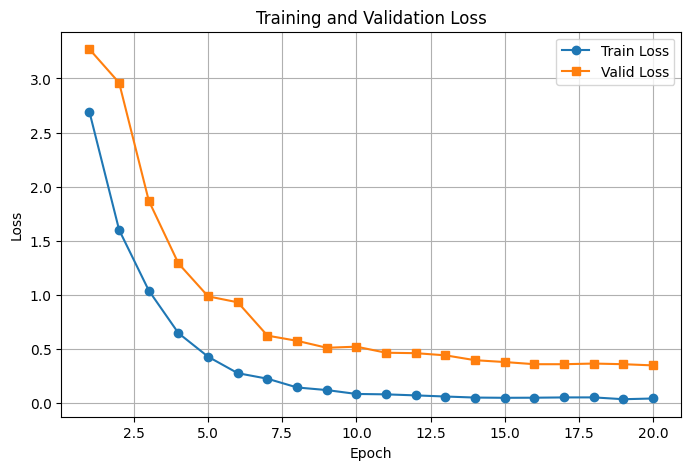

In [ ]:
import re
import matplotlib.pyplot as plt

# 1. Paste your log text here as a multi-line string:
log_text = """
Epoch: 1, lr: 1.00e-03 - train loss: 2.69 - valid loss: 3.27, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 1.60 - valid loss: 2.96, valid error: 7.69e-01
Epoch: 3, lr: 9.05e-04 - train loss: 1.04 - valid loss: 1.87, valid error: 4.62e-01
Epoch: 4, lr: 8.58e-04 - train loss: 6.46e-01 - valid loss: 1.29, valid error: 2.69e-01
Epoch: 5, lr: 8.11e-04 - train loss: 4.28e-01 - valid loss: 9.86e-01, valid error: 1.92e-01
Epoch: 6, lr: 7.63e-04 - train loss: 2.76e-01 - valid loss: 9.31e-01, valid error: 1.15e-01
Epoch: 7, lr: 7.16e-04 - train loss: 2.25e-01 - valid loss: 6.23e-01, valid error: 3.85e-02
Epoch: 8, lr: 6.68e-04 - train loss: 1.44e-01 - valid loss: 5.75e-01, valid error: 3.85e-02
Epoch: 9, lr: 6.21e-04 - train loss: 1.20e-01 - valid loss: 5.11e-01, valid error: 7.69e-02
Epoch: 10, lr: 5.74e-04 - train loss: 8.41e-02 - valid loss: 5.21e-01, valid error: 7.69e-02
Epoch: 11, lr: 5.26e-04 - train loss: 8.04e-02 - valid loss: 4.65e-01, valid error: 7.69e-02
Epoch: 12, lr: 4.79e-04 - train loss: 7.08e-02 - valid loss: 4.61e-01, valid error: 3.85e-02
Epoch: 13, lr: 4.32e-04 - train loss: 6.04e-02 - valid loss: 4.41e-01, valid error: 3.85e-02
Epoch: 14, lr: 3.84e-04 - train loss: 5.07e-02 - valid loss: 3.96e-01, valid error: 3.85e-02
Epoch: 15, lr: 3.37e-04 - train loss: 4.85e-02 - valid loss: 3.79e-01, valid error: 3.85e-02
Epoch: 16, lr: 2.89e-04 - train loss: 4.94e-02 - valid loss: 3.59e-01, valid error: 0.00e+00
Epoch: 17, lr: 2.42e-04 - train loss: 5.20e-02 - valid loss: 3.59e-01, valid error: 3.85e-02
Epoch: 18, lr: 1.95e-04 - train loss: 5.23e-02 - valid loss: 3.65e-01, valid error: 3.85e-02
Epoch: 19, lr: 1.47e-04 - train loss: 3.54e-02 - valid loss: 3.59e-01, valid error: 3.85e-02
Epoch: 20, lr: 1.00e-04 - train loss: 4.22e-02 - valid loss: 3.48e-01, valid error: 3.85e-02
Epoch loaded: 16 - test loss: 1.55e-01, test error: 0.00e+00
"""

# 2. Use a regex pattern to capture epoch, train loss, valid loss, etc.
pattern = r"Epoch:\s*(\d+).*train loss:\s*([\de\.-]+).*valid loss:\s*([\de\.-]+).*valid error:\s*([\de\.-]+)"

epochs = []
train_losses = []
valid_losses = []

# 3. Loop through each line and extract the data
for line in log_text.strip().split("\n"):
    match = re.search(pattern, line)
    if match:
        epoch = int(match.group(1))
        train_loss = float(match.group(2))
        valid_loss = float(match.group(3))
        epochs.append(epoch)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

# 4. Plot train and validation loss
plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, marker='o', label='Train Loss')
plt.plot(epochs, valid_losses, marker='s', label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


If everything goes well, you should see a training curve simular to this one:


```
Epoch: 1, lr: 1.00e-03 - train loss: 2.69 - valid loss: 3.27, valid error: 9.62e-01
Epoch: 2, lr: 9.53e-04 - train loss: 1.60 - valid loss: 2.96, valid error: 7.69e-01
Epoch: 3, lr: 9.05e-04 - train loss: 1.04 - valid loss: 1.87, valid error: 4.62e-01
Epoch: 4, lr: 8.58e-04 - train loss: 6.46e-01 - valid loss: 1.29, valid error: 2.69e-01
Epoch: 5, lr: 8.11e-04 - train loss: 4.28e-01 - valid loss: 9.86e-01, valid error: 1.92e-01
Epoch: 6, lr: 7.63e-04 - train loss: 2.76e-01 - valid loss: 9.31e-01, valid error: 1.15e-01
Epoch: 7, lr: 7.16e-04 - train loss: 2.25e-01 - valid loss: 6.23e-01, valid error: 3.85e-02
Epoch: 8, lr: 6.68e-04 - train loss: 1.44e-01 - valid loss: 5.75e-01, valid error: 3.85e-02
Epoch: 9, lr: 6.21e-04 - train loss: 1.20e-01 - valid loss: 5.11e-01, valid error: 7.69e-02
Epoch: 10, lr: 5.74e-04 - train loss: 8.41e-02 - valid loss: 5.21e-01, valid error: 7.69e-02
Epoch: 11, lr: 5.26e-04 - train loss: 8.04e-02 - valid loss: 4.65e-01, valid error: 7.69e-02
Epoch: 12, lr: 4.79e-04 - train loss: 7.08e-02 - valid loss: 4.61e-01, valid error: 3.85e-02
Epoch: 13, lr: 4.32e-04 - train loss: 6.04e-02 - valid loss: 4.41e-01, valid error: 3.85e-02
Epoch: 14, lr: 3.84e-04 - train loss: 5.07e-02 - valid loss: 3.96e-01, valid error: 3.85e-02
Epoch: 15, lr: 3.37e-04 - train loss: 4.85e-02 - valid loss: 3.79e-01, valid error: 3.85e-02
Epoch: 16, lr: 2.89e-04 - train loss: 4.94e-02 - valid loss: 3.59e-01, valid error: 0.00e+00
Epoch: 17, lr: 2.42e-04 - train loss: 5.20e-02 - valid loss: 3.59e-01, valid error: 3.85e-02
Epoch: 18, lr: 1.95e-04 - train loss: 5.23e-02 - valid loss: 3.65e-01, valid error: 3.85e-02
Epoch: 19, lr: 1.47e-04 - train loss: 3.54e-02 - valid loss: 3.59e-01, valid error: 3.85e-02
Epoch: 20, lr: 1.00e-04 - train loss: 4.22e-02 - valid loss: 3.48e-01, valid error: 3.85e-02
Epoch loaded: 16 - test loss: 1.55e-01, test error: 0.00e+00
```

You should reach a perfect classification on both training and validation sets in this case as well.


That's all!
